# Plots for our Paper

## Preamble

In [47]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [48]:
%autoreload 2

%matplotlib inline

import sys
sys.path.append('../')
import fluctuations
import twenty_one
import physics as phys

import matplotlib.pyplot as plt

import numpy as np
from scipy.interpolate import interp1d

import dill

In [49]:
import matplotlib.pylab as pylab
from plot_params import params
pylab.rcParams.update(params)

cols_default = plt.rcParams['axes.prop_cycle'].by_key()['color']

## Load Baryon Temperature Data

In [50]:
Tb_data_folder = '/scratch/gpfs/hongwanl/millicharged_DM_with_bath/Vrel_scan_fixed_He_bug/for_Anastasia/'

mm_string_list = ['10_MeV', '30_MeV', '100_MeV', '300_MeV', '1_GeV', '3_GeV', '10_GeV', '30_GeV', '100_GeV', '300_GeV']

Vlis = np.loadtxt(open(Tb_data_folder+'Vlis.csv'), delimiter=',')
Qlis = np.loadtxt(open(Tb_data_folder+'Qlis.csv'), delimiter=',')
zlis = np.loadtxt(open(Tb_data_folder+'zlis.csv'), delimiter=',')

# in GeV
mmlis = np.array([0.01, 0.03, 0.1, 0.3, 1., 3., 10., 30., 100., 300.])

# dimensions mmlis x zlis x Qlis x Vlis
data_Tb = np.array([[np.loadtxt(Tb_data_folder+'mc100MeV_mm'+mm_string+'_z_'+str(int(z))+'.csv', delimiter=',') for z in zlis] for mm_string in mm_string_list])


# change to Vlis x zlis x Qlis x mmlis
data_Tb = np.transpose(data_Tb, axes=(3, 1, 2, 0)) / phys.kB


## Load Power Spectra

The power spectra were computed by first adding a heating component provided by Anastasia to the result from DM. The 21-cm brightness temperature is then computed using $x_\alpha$ data supplied by Anastasia as well. This result is then transformed to obtain the power spectrum.

We do this for all 140 models provided by Anastasia, labeled in the final data files by the integer in the file name. 

In [69]:
# Index of the model we are considering
idx = 3


# 21-cm Brightness Temperature Data File
T21_fluc = dill.load(open('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/power_spec/all_models/mc100MeV_full_smooth_deg3_'+str(idx)+'.p', 'rb'))

k_ary, delta2_ary = T21_fluc.power_spec 

# k_ary x z_ary x Q_ary x mm_ary
print(delta2_ary.shape)

from scipy.io import loadmat

# x_alpha Data File, 140 x zlis
xA_data = loadmat('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/xA_from_Anastasia/xa_astromodel.mat')['xout']

# dTk Data File, 140 x zlis
dTk_data = loadmat('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/xA_from_Anastasia/dTK_astromodel.mat')['dTkout']

(4096, 22, 90, 10)


We are now going to pick a random point in the data, and make a plot of all the gas temperature before adding heating, the heating component, the CMB temperature and the spin temperature, as a sanity check. 

V_rel:  0.0
Q:  0.0017216903932435344
m_m in GeV:  0.3


/home/hongwanl/millicharged_DM_with_bath/notebooks/../twenty_one.py:35: RuntimeWarning: invalid value encountered in power
  * np.sqrt((1. + z_ary) / 10) * (Tb_ary / T_se)**(-2/3)


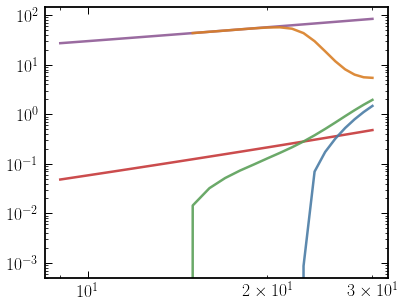

In [70]:
V_ind = 0
Q_ind = 48
mm_ind = 3

print('V_rel: ', T21_fluc.v_ary[V_ind])
print('Q: ', T21_fluc.data_dict['Q'][Q_ind])
print('m_m in GeV: ', T21_fluc.data_dict['m_m'][mm_ind])

plt.figure()

plt.loglog()

Tb_ary = data_Tb[V_ind, :, Q_ind, mm_ind]

plt.plot(zlis, Tb_ary)
plt.plot(zlis, dTk_data[idx, :])
plt.plot(zlis, Tb_ary + dTk_data[idx, :])
plt.plot(zlis, phys.TCMB(1. + zlis) / phys.kB)
plt.plot(zlis, twenty_one.TS(zlis, xA_data[idx, :], Tb_ary + dTk_data[idx, :]))

## Load Experimental Data

In [24]:
expt_data_dir = '/home/hongwanl/21cmBounds/data/'


# [z, k, Delta^2 in mK^2]
MWA_2016_high_z = np.array([[12.2, 0.18*phys.h, 2.5e7], [15.35, 0.21*phys.h, 8.3e7], [17.05, 0.22*phys.h, 2.7e8]])

AARTFAAC_high_z = np.array([[(17.9 + 18.6) / 2., 0.144*phys.h, 7388.**2]])

## Power Spectrum at Fixed Redshift

Redshift:  20.0
Q:  0.0017216903932435344
m_m in GeV:  0.3
k in Mpc^-1:  0.10028091636980907


(0.01, 1.0)

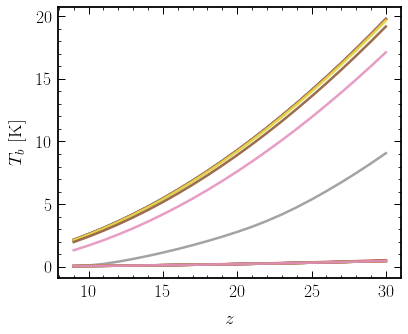

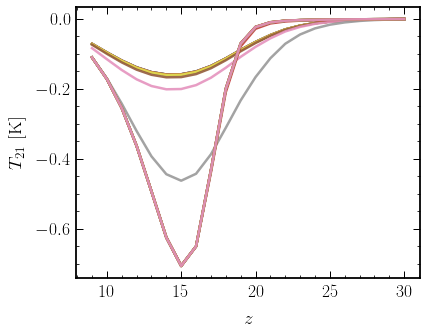

<Figure size 443.077x360 with 0 Axes>

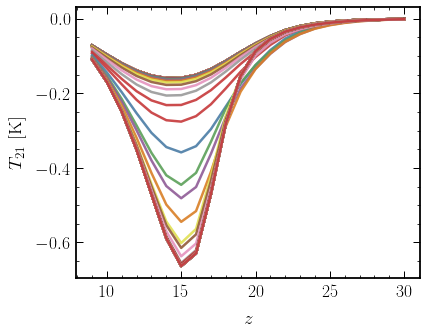

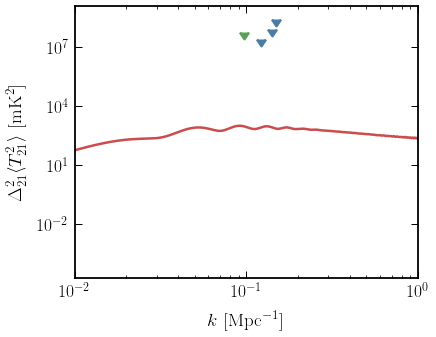

In [26]:
z_ind = 11
Q_ind = 48
mm_ind = 3
# z_ind = 3
# Q_ind = 50
# mm_ind = 2
k_ind = 1536
print('Redshift: ', T21_fluc.data_dict['z'][z_ind])
print('Q: ', T21_fluc.data_dict['Q'][Q_ind])
print('m_m in GeV: ', T21_fluc.data_dict['m_m'][mm_ind])
print('k in Mpc^-1: ', k_ary[k_ind])

# plt.figure()

# plt.yscale('log')

# plt.plot(Vlis*29, data_Tb[:, 6:12, -1, mm_ind])

# plt.xlabel(r'$v_\mathrm{bc}$ [km s$^{-1}$]')
# plt.ylabel(r'$T_b$ [K]')

plt.figure()

# plt.plot(zlis, np.transpose(data_Tb[::25, :, -1, mm_ind]))

plt.plot(zlis, data_Tb[0, :, ::5, mm_ind])

plt.xlabel(r'$z$')
plt.ylabel(r'$T_b$ [K]')


# plt.figure()

# print(zlis[6:12])

# plt.plot(T21_fluc.v_ary, T21_fluc.f_ary[:, 6:12, -1, mm_ind])

# plt.xlabel(r'$v_\mathrm{bc}$ [km s$^{-1}$]')
# plt.ylabel(r'$T_{21}$ [mK]')

plt.figure()

global_signal_v = T21_fluc.f_ary[0, :, ::5, mm_ind]

plt.plot(T21_fluc.data_dict['z'], global_signal_v)

plt.xlabel(r'$z$')
plt.ylabel(r'$T_{21}$ [K]')

plt.figure()

plt.figure()

global_signal = T21_fluc.v_fluc.mean_f(T21_fluc.f_in_v, T21_fluc.v_ary)

plt.plot(T21_fluc.data_dict['z'], global_signal[:, :, mm_ind])

plt.xlabel(r'$z$')
plt.ylabel(r'$T_{21}$ [K]')

plt.figure()

plt.loglog()

plt.plot(k_ary, delta2_ary[:, z_ind, Q_ind, mm_ind]*1e6)
# plt.plot(k_ary, delta2_ary[:, z_ind-2, Q_ind, mm_ind]*1e6)
# plt.plot(k_ary, delta2_ary[:, z_ind-5, Q_ind, mm_ind]*1e6)
plt.scatter(MWA_2016_high_z[:,1], MWA_2016_high_z[:,2], color=cols_default[1], marker=11,s=80)
plt.scatter(AARTFAAC_high_z[:,1], AARTFAAC_high_z[:,2], color=cols_default[2], marker=11, s=80)

plt.xlabel(r'$k$ [Mpc$^{-1}$]')
plt.ylabel(r'$\Delta_{21}^2 \langle T_{21}^2 \rangle$ [mK$^2$]')

plt.xlim(1e-2, 1.)
# plt.ylim(1e3, 1e9)

In [27]:
test_indices = np.moveaxis(np.indices(delta2_ary[k_ind, :, :, :].shape), 0, -1)

max_ind = np.argmax(delta2_ary[k_ind]*1e6)

print(test_indices.reshape(-1, test_indices.shape[-1])[max_ind])

print(delta2_ary[k_ind, 11, 48, 4])

[ 6 42  3]
0.0008758863948773768


Redshift:  20.0
Q:  0.0017216903932435344
m_m in GeV:  1.0
k in Mpc^-1:  0.10028091636980907


(0.01, 1)

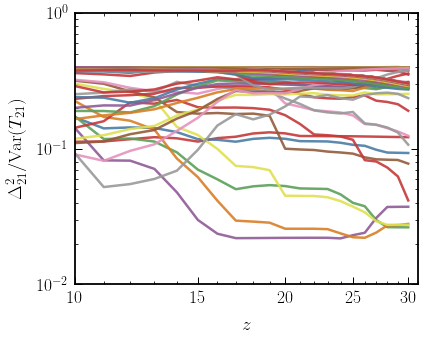

In [28]:
from matplotlib.ticker import(MultipleLocator, FormatStrFormatter, NullFormatter)

plt.figure()

z_ind = 11
Q_ind = 48
mm_ind = 4
k_ind = 1536
print('Redshift: ', T21_fluc.data_dict['z'][z_ind])
print('Q: ', T21_fluc.data_dict['Q'][Q_ind])
print('m_m in GeV: ', T21_fluc.data_dict['m_m'][mm_ind])
print('k in Mpc^-1: ', k_ary[k_ind])

plt.loglog()

plt.plot(T21_fluc.data_dict['z'], delta2_ary[k_ind, :, :, mm_ind] / T21_fluc.var[:, :, mm_ind])
# plt.plot(k_ary, delta2_ary[:, z_ind-2, Q_ind, mm_ind]*1e6)
# plt.plot(k_ary, delta2_ary[:, z_ind-5, Q_ind, mm_ind]*1e6)
# plt.scatter(MWA_2016_high_z[:,1], MWA_2016_high_z[:,2], color=cols_default[1], marker=11,s=80)
# plt.scatter(AARTFAAC_high_z[:,1], AARTFAAC_high_z[:,2], color=cols_default[2], marker=11, s=80)

plt.xlabel(r'$z$')
plt.ylabel(r'$\Delta_{21}^2 / \mathrm{Var}(T_{21})$')

ax = plt.gca()

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%2.0d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_minor_formatter(NullFormatter())

# plt.yticks([1e-8, 1e-6, 1e-4, 1e-2, 1, 1e2, 1e4, 1e6])

plt.xlim(10., 31.)
plt.ylim(1e-2, 1)



Redshift:  20.0
Q:  0.0017216903932435344
m_m in GeV:  1.0
k in Mpc^-1:  0.10028091636980907


(1e-10, 1)

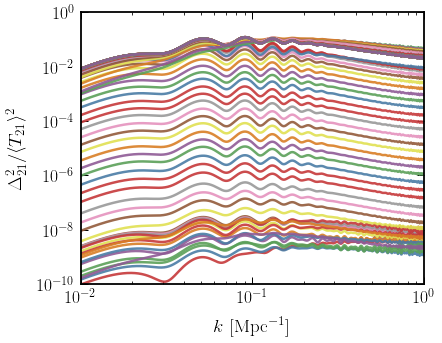

In [36]:
from matplotlib.ticker import(MultipleLocator, FormatStrFormatter, NullFormatter)

plt.figure()

z_ind = 11
Q_ind = 48
mm_ind = 4
k_ind = 1536
print('Redshift: ', T21_fluc.data_dict['z'][z_ind])
print('Q: ', T21_fluc.data_dict['Q'][Q_ind])
print('m_m in GeV: ', T21_fluc.data_dict['m_m'][mm_ind])
print('k in Mpc^-1: ', k_ary[k_ind])

plt.loglog()

plt.plot(k_ary, delta2_ary[:, z_ind, 6:, mm_ind] / global_signal[z_ind, 6:, mm_ind]**2)
# plt.plot(k_ary, delta2_ary[:, z_ind-2, Q_ind, mm_ind]*1e6)
# plt.plot(k_ary, delta2_ary[:, z_ind-5, Q_ind, mm_ind]*1e6)
# plt.scatter(MWA_2016_high_z[:,1], MWA_2016_high_z[:,2], color=cols_default[1], marker=11,s=80)
# plt.scatter(AARTFAAC_high_z[:,1], AARTFAAC_high_z[:,2], color=cols_default[2], marker=11, s=80)

plt.xlabel(r'$k$ [Mpc$^{-1}$]')
plt.ylabel(r'$\Delta_{21}^2 / \langle T_{21} \rangle^2$')

ax = plt.gca()

# ax.xaxis.set_major_locator(MultipleLocator(5))
# ax.xaxis.set_major_formatter(FormatStrFormatter('%2.0d'))
# ax.xaxis.set_minor_locator(MultipleLocator(1))
# ax.xaxis.set_minor_formatter(NullFormatter())

# plt.yticks([1e-8, 1e-6, 1e-4, 1e-2, 1, 1e2, 1e4, 1e6])

plt.xlim(1e-2, 1.)
plt.ylim(1e-10, 1)



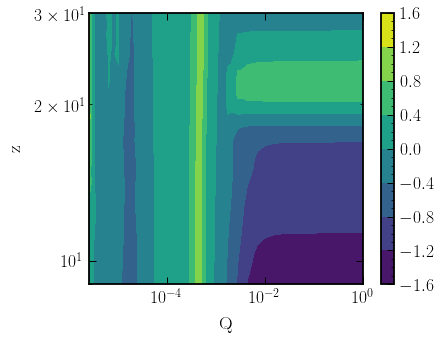

In [30]:
T21_rms_over_mean_T_minus_TCDM = np.sqrt(T21_fluc.var[:, 6:, mm_ind]) / np.abs(global_signal[:, 6:, mm_ind] - global_signal[:, 0, mm_ind, None])

plt.loglog()

plt.contourf(T21_fluc.data_dict['Q'][6:], T21_fluc.data_dict['z'], np.log10(T21_rms_over_mean_T_minus_TCDM))

plt.xlabel('Q')
plt.ylabel('z')

plt.colorbar()

In [31]:
T21_rms_over_mean_T_minus_TCDM[0]

array([ 1.5848014 ,  1.09256072,  0.8260931 ,  0.76051639,  0.56891836,
        0.53824098,  0.59973514,  0.49704833,  0.48276804,  0.50892816,
        0.3771789 ,  0.25435323,  0.2117973 ,  0.22116283,  0.31734467,
        0.44228718,  0.54936185,  0.6430174 ,  0.75231498,  0.9102672 ,
        1.03234128,  1.13920009,  1.23451155,  1.29981232,  1.36838642,
        1.44843616,  1.50342736,  1.6083082 ,  1.78110923,  1.9140762 ,
        2.28104682,  3.12271578,  4.15228776, 14.06531493,  6.0803778 ,
        3.00083727,  1.83124503,  1.21803291,  0.94516887,  0.7680927 ,
        0.59040306,  0.43845612,  0.35178736,  0.27565621,  0.18851109,
        0.14225727,  0.11409637,  0.07856174,  0.06030779,  0.05322595,
        0.04473216,  0.04061675,  0.03929869,  0.03776426,  0.03697542,
        0.0365905 ,  0.03614172,  0.03592723,  0.03581996,  0.03569512,
        0.03562539,  0.03557382,  0.03551377,  0.03546437,  0.0354136 ,
        0.03535454,  0.03536253,  0.03539275,  0.03542825,  0.03

z:  20.0
z:  20.0
z:  20.0


(0.1, 1.0)

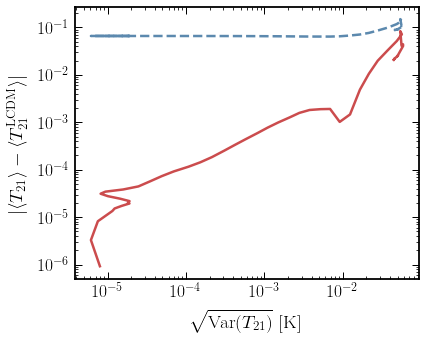

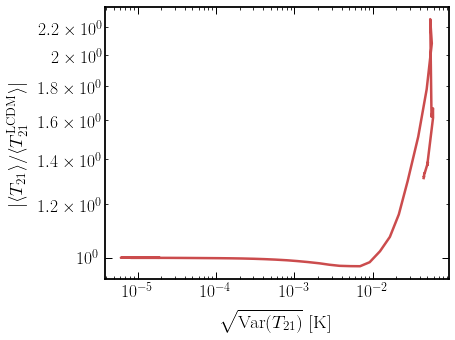

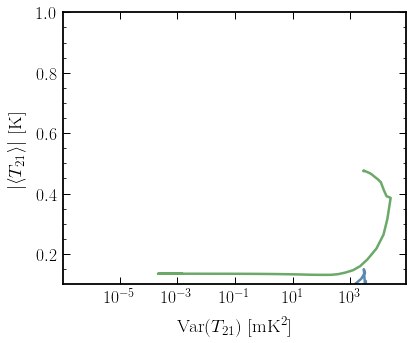

In [32]:
plt.figure()

plt.loglog()

print('z: ', T21_fluc.data_dict['z'][11])

# plt.plot(T21_fluc.var[11, 6:, mm_ind], T21_rms_over_mean_T_minus_TCDM[11, :])
plt.plot(np.sqrt(T21_fluc.var[11, 6:, mm_ind]), np.abs(global_signal[11, 6:, mm_ind] - global_signal[11, 0, mm_ind, None]))
plt.plot(np.sqrt(T21_fluc.var[11, 6:, mm_ind]), np.abs(global_signal[11, 6:, mm_ind]), '--')

plt.xlabel(r'$\sqrt{\mathrm{Var}(T_{21})}$ [K]')
plt.ylabel(r'$|\langle T_{21} \rangle - \langle T_{21}^\mathrm{LCDM} \rangle |$')


plt.figure()

plt.loglog()

print('z: ', T21_fluc.data_dict['z'][11])

# plt.plot(T21_fluc.var[11, 6:, mm_ind], T21_rms_over_mean_T_minus_TCDM[11, :])
plt.plot(np.sqrt(T21_fluc.var[11, 6:, mm_ind]), np.abs(global_signal[11, 6:, mm_ind] / global_signal[11, 0, mm_ind, None]))
# plt.plot(T21_fluc.var[11, 6:, mm_ind],T21_fluc.var[11, 6:, mm_ind],':')


plt.xlabel(r'$\sqrt{\mathrm{Var}(T_{21})}$ [K]')
plt.ylabel(r'$|\langle T_{21} \rangle / \langle T_{21}^\mathrm{LCDM} \rangle |$')


plt.figure()

plt.xscale('log')

print('z: ', T21_fluc.data_dict['z'][11])

# plt.plot(T21_fluc.var[11, 6:, mm_ind], T21_rms_over_mean_T_minus_TCDM[11, :])
plt.plot(T21_fluc.var[16, 6:, mm_ind]*1e6, np.abs(global_signal[16, 6:, mm_ind]))
plt.plot(T21_fluc.var[11, 6:, mm_ind]*1e6, np.abs(global_signal[11, 6:, mm_ind]))
plt.plot(T21_fluc.var[8, 6:, mm_ind]*1e6, np.abs(global_signal[8, 6:, mm_ind]))
# plt.plot(T21_fluc.var[11, 6:, mm_ind]*1e6, np.abs(global_signal[11, 0, mm_ind]) * np.ones_like(T21_fluc.var[11, 6:, mm_ind]), '--')
# plt.plot(T21_fluc.var[11, 6:, mm_ind], T21_fluc.var[11, 6:, mm_ind], ':')
# plt.plot(T21_fluc.var[11, 6:, mm_ind],T21_fluc.var[11, 6:, mm_ind],':')


plt.xlabel(r'$\mathrm{Var}(T_{21})$ [mK$^2$]')
plt.ylabel(r'$|\langle T_{21} \rangle|$ [K]')

plt.ylim(0.1, 1)


Redshift:  20.0
Q:  0.00010531055707361888
m_m in GeV:  1.0
k in Mpc^-1:  0.10028091636980907


(1e-08, 1000000.0)

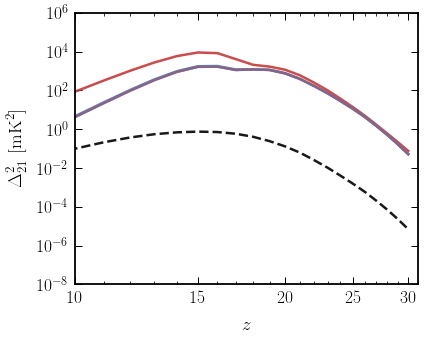

In [45]:
from matplotlib.ticker import(MultipleLocator, FormatStrFormatter, NullFormatter)

plt.figure()

z_ind = 11
Q_ind = 30
mm_ind = 4
k_ind = 1536
print('Redshift: ', T21_fluc.data_dict['z'][z_ind])
print('Q: ', T21_fluc.data_dict['Q'][Q_ind])
print('m_m in GeV: ', T21_fluc.data_dict['m_m'][mm_ind])
print('k in Mpc^-1: ', k_ary[k_ind])

plt.loglog()

plt.plot(T21_fluc.data_dict['z'], delta2_ary[k_ind, :, 50::10, mm_ind]*1e6)
plt.plot(T21_fluc.data_dict['z'], delta2_ary[k_ind, :, Q_ind, mm_ind]*1e6, 'k--')
# plt.plot(k_ary, delta2_ary[:, z_ind-2, Q_ind, mm_ind]*1e6)
# plt.plot(k_ary, delta2_ary[:, z_ind-5, Q_ind, mm_ind]*1e6)
# plt.scatter(MWA_2016_high_z[:,1], MWA_2016_high_z[:,2], color=cols_default[1], marker=11,s=80)
# plt.scatter(AARTFAAC_high_z[:,1], AARTFAAC_high_z[:,2], color=cols_default[2], marker=11, s=80)

plt.xlabel(r'$z$')
plt.ylabel(r'$\Delta_{21}^2$ [mK$^2$]')

ax = plt.gca()

ax.xaxis.set_major_locator(MultipleLocator(5))
ax.xaxis.set_major_formatter(FormatStrFormatter('%2.0d'))
ax.xaxis.set_minor_locator(MultipleLocator(1))
ax.xaxis.set_minor_formatter(NullFormatter())

plt.yticks([1e-8, 1e-6, 1e-4, 1e-2, 1, 1e2, 1e4, 1e6])

plt.xlim(10., 31.)
plt.ylim(1e-8, 1e6)



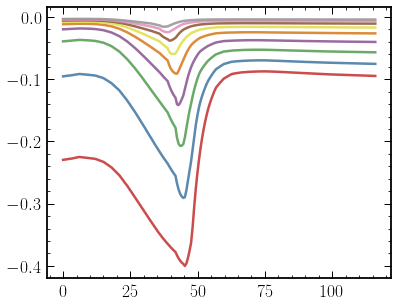

In [46]:
plt.figure()

plt.plot(T21_fluc.v_ary, T21_fluc.f_ary[:, 9:18, -1, mm_ind])

In [19]:
import pickle

data_raw = pickle.load(open('/scratch/gpfs/hongwanl/millicharged_DM_with_bath/Vrel_scan_fixed_He_bug/data_Vrel_m_m_100_MeV_m_C_100_MeV.p', 'rb'))